# Global indicator project
## Create study region polygon with 10km buffer
This notebook shows the process to load administrative boundary (if it is supplied by the administrative office), and create a 10km buffer around the boundary to set up a study region. This should be the first step of the project to set up study region boundary. All the functions are stored in ```setup_OSMnetwork.py```, and imported in this notebook to produce outcome. Study region parameters are in ```config.py```.

** define projection for each area: study region files are projected to lat-lng for consistency, and to the local UTM projection when needed for meter-based calculations. 

In [1]:
#load local OSM python module
from setup_OSMnetwork import * 
#load project configeration
from config import *

## Define place boundary projection

In [2]:
# learn study region adminitrative file crs
gdf = gpd.GeoDataFrame.from_file(boundary_filepath)
gdf.crs

{'init': 'epsg:3742'}

In [3]:
gdf_proj = project_studyregion_gdf(boundary_filepath, to_crs=to_crs, to_latlong=True)
gdf_proj

,Area_Acres,NAME,CODE,Peri_Mile,Area_Miles,Per_Mile,Shape_Leng,Shape_Area,geometry
0,5902215.729,MARICOPA,7,508.732,9222.2114,507.8426,816979.498066,2.388554e+10,POLYGON ((-113.3338807743132 33.08807640284793...


## Get place boundary with 10km buffer

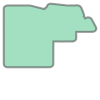

In [4]:
polygon_buffer = get_bufferedstudyregion_polygon(boundary_filepath, buffer_dist=1e4, crs=crs, to_crs=to_crs, to_latlong=True)
polygon_buffer[0]

## Get place boundary with 10km buffer bbox

In [5]:
# get bounding box from study region boundary shapefile
# check the shapefile format, study region boundary shapefile should specify lat lon geometry
# Bounding box formatted as a 4 element tuple: (lng_max, lat_min, lng_min, lat_max)
# otherwise, we can use can generate a bounding box by going to http://boundingbox.klokantech.com/ and selecting the CSV format.   

bbox = get_bufferedstudyregion_bbox(boundary_filepath, crs=crs, to_crs=to_crs, to_latlong=True)
bbox

(-113.44197628074733,
 32.414715167745996,
 -110.93231493458158,
 34.13836571274371)